Just fill in the timestamp and work_dir, then click run all and it should work

In [34]:
import matplotlib.pyplot as plt

In [35]:
timestamp = '20231210_213745'
work_dir = 'unet_fcn_stare_stare'

log_file = f'{timestamp}.log'
directory = f'work_dirs/{work_dir}/{timestamp}'
path = directory + '/' + log_file


In [36]:
train_log = []
val_log = []
with open(path, 'r') as f:
    for line in f:
        words = line.split(" ")
        # print(words)
        if 'Iter(train)' in words:                              # train line
            # print(words)
            idx = words.index('loss:')
            train_log.append( float(words[idx+1]) )             # log train loss
        elif 'Iter(val)' in words and '[22/22]' in words:       # val line
            # print(words)
            idx = words.index('mIoU:')                          # log mIoU
            val_log.append( float(words[idx+1]) )

In [37]:
list(range(len(train_log)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

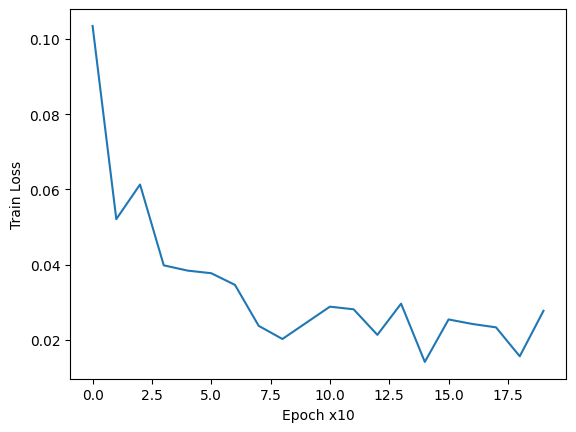

In [38]:
plt.plot(list(range(len(train_log))),
        train_log)
plt.xlabel('Epoch x10')
plt.ylabel('Train Loss')
plt.savefig(directory + '/train_loss.png')

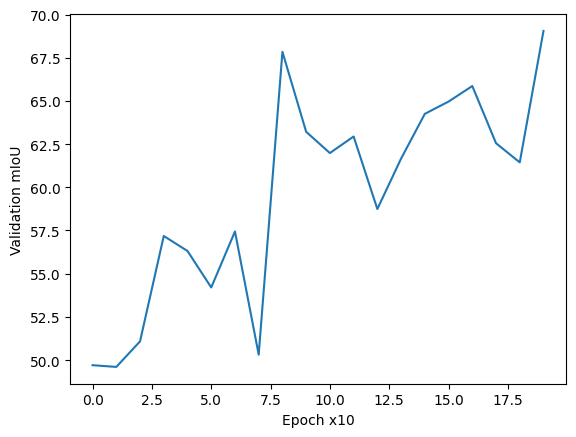

In [39]:
plt.plot(list(range(len(val_log))),
        val_log)
plt.xlabel('Epoch x10')
plt.ylabel('Validation mIoU')
plt.savefig(directory + '/val_mIoU.png')